<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [21]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**First 5 rows**

In [11]:
data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [41]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

**Another way is to do it with `apply`.**

In [9]:
data['Age_category'] = data['Age'].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [22]:
data['Sex'].unique()
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.55
1    0.24
2    0.21
Name: Pclass, dtype: float64
108
0


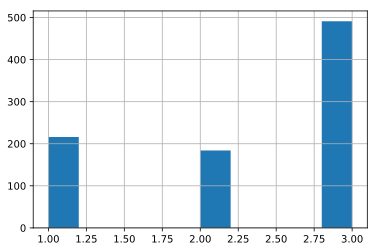

In [49]:
# в общем
print(data['Pclass'].value_counts())
print(data['Pclass'].value_counts(normalize=True))
data['Pclass'].hist()

# для мужиков
print(data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Pclass'].count())
# для женщин
print(data[(data['Pclass'] == 2) & (data['Sex'] == 'feale')]['Pclass'].count())

In [88]:
# из солюшена, куда удобней и лаконичней
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [90]:
print(data['Fare'].describe())
print(data['Fare'].median())
print(data['Fare'].std())

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64
14.4542
49.693428597180905


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [60]:
# найдем средний возраст тех, кто выжил
s1 = data[data['Survived'] == 1]['Age'].mean()
print(s1)
# и тех, кто отьехал
s2 = data[data['Survived'] == 0]['Age'].mean()
print(s2)
# сравним
print(s1>s2)

28.343689655172415
30.62617924528302
False


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [67]:
# получить количество молодых
young_all = data[data['Age'] < 30]['Age'].count()
#print(young_all)
# получить количество выживших молодых
young_surv = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Age'].count()
#print(young_surv)
# поделить их, получить долю
print(young_surv/young_all * 100)

# повторить для стареков
old_all = data[data['Age'] > 60]['Age'].count()
#print(old_all)
# получить количество выживших молодых
old_surv = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Age'].count()
#print(old_surv)
# поделить их, получить долю
print(old_surv/old_all * 100)


40.625
22.727272727272727


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

In [68]:
# количество мужиков
men_all = data[data['Sex'] == 'male']['Sex'].count()
# получить количество выживших мужиков
men_surv = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Sex'].count()
# поделить их, получить долю
print(men_surv/men_all * 100)

# получить количество женщин
women_all = data[data['Sex'] == 'female']['Sex'].count()
#print(young_all)
# получить количество выживших женщин
women_surv = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Sex'].count()
#print(young_surv)
# поделить их, получить долю
print(women_surv/women_all * 100)

18.890814558058924
74.20382165605095


**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [70]:
data['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [72]:
# тест, попробуем распарсить
data.loc[1, 'Name'].split(',')[1].split()[1]

'Owen'

In [71]:
first_names = data.loc[data['Sex'] == 'male', 'Name'].apply(lambda 
                                                            full_name: 
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Thomas     13
Charles    13
Name: Name, dtype: int64

**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class


Как средний возраст мужчин/женщин зависит от 'Pclass'? Выбери все правильные утверждения: 
- В среднем, мужики в 1м классе старее чем 40
- В среднем, женщины в 1м классе сторее чем 40
- Мужики во всех классах в среднем старее чем женщины в тех же классах
- В среднем, пасажиры первого класса старее чем пассажиры 2го, а те в свою очередь взрослее пассажиров 3го

In [87]:
# Для первых двух утверждений нужно найти среднее у возраста, для 1го класса и женщин/мужчин
# 3е утверждение состоит из 3х. Ищем возраст мужиков 1го класса, сравниванем его с возрастом женщин этого класса. Так у всех 3х классов
# Почти тоже самое, но без деления на пол

#1
i1 = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean()
print('Средний возраст мужчин в 1м классе:', i1, i1>40)

#2
i2 = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean()
print('Средний возраст женщин в 1м классе:', i2, i2>40)

#3 
i3 = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].mean()
i4 = data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].mean()
i5 = data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].mean()
i6 = data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].mean()

print('Средний возраст мужчин в 1м классе: {}, женщин: {}, утверждение {}'.format(i1, i2, i1>i2))
print('Средний возраст мужчин в 2м классе: {}, женщин: {}, утверждение {}'.format(i3, i4, i3>i4))
print('Средний возраст мужчин в 3м классе: {}, женщин: {}, утверждение {}'.format(i5, i6, i5>i6))

i7 = data[data['Pclass'] == 1]['Age'].mean()
i8 = data[data['Pclass'] == 2]['Age'].mean()
i9 = data[data['Pclass'] == 3]['Age'].mean()
print('Средний возраст пассажиров в 1м классе: {}, 2м: {}, 3м: {}, утверждение {}'.format(i7, i8, i9, i7>i8 and i8>i9))

Средний возраст мужчин в 1м классе: 41.28138613861386 True
Средний возраст женщин в 1м классе: 34.61176470588235 False
Средний возраст мужчин в 1м классе: 41.28138613861386, женщин: 34.61176470588235, утверждение True
Средний возраст мужчин в 2м классе: 30.74070707070707, женщин: 28.722972972972972, утверждение True
Средний возраст мужчин в 3м классе: 26.507588932806325, женщин: 21.75, утверждение True
Средний возраст пассажиров в 1м классе: 38.233440860215055, 2м: 29.87763005780347, 3м: 25.14061971830986, утверждение True


## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)